In [55]:
import qtm.qcompilation
import qtm.fubini_study
import numpy as np
import types
import qiskit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
num_qubits = 3
num_layers = 1

thetas = np.random.rand((2*num_qubits)*num_layers)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_polygongraph_ansatz(qc, thetas, num_layers)
qc1 = qiskit.QuantumCircuit(3,3)
qc1.h(0)
qc1 = qc.compose(qc1)
print(qc1.draw())
print(qtm.fubini_study.qng_hessian(qc, thetas, qtm.ansatz.create_polygongraph_ansatz, num_layers = 1))

     ┌─────────────┐    ┌────────────┐                      ░ ┌───┐
q_0: ┤ Ry(0.43291) ├──■─┤ Ry(0.6903) ├───────────────────■──░─┤ H ├
     ├─────────────┤  │ ├────────────┤                   │  ░ └───┘
q_1: ┤ Ry(0.36105) ├──■─┤ Ry(0.7702) ├─■─────────────────┼──░──────
     ├─────────────┴┐   └────────────┘ │ ┌─────────────┐ │  ░      
q_2: ┤ Ry(0.095183) ├──────────────────■─┤ Ry(0.47606) ├─■──░──────
     └──────────────┘                    └─────────────┘    ░      
c: 3/══════════════════════════════════════════════════════════════
                                                                   


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


[[-0.08211667 -0.08033333 -0.04936667 -0.06915    -0.06285    -0.02075   ]
 [-0.08268333 -0.07786667 -0.05106667 -0.06558333 -0.06136667 -0.01805   ]
 [-0.05016667 -0.04941667 -0.02951667 -0.04216667 -0.03771667 -0.01556667]
 [-0.06813333 -0.06398333 -0.04166667 -0.05358333 -0.04611667 -0.0176    ]
 [-0.06045    -0.0622     -0.03761667 -0.04693333 -0.04481667 -0.01356667]
 [-0.01983333 -0.01898333 -0.01503333 -0.01783333 -0.01306667  0.00106667]]


In [56]:
import qtm.qcompilation
import numpy as np
import types, qiskit
num_qubits = 3
num_layers = 1


thetas = np.ones((3*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_hypergraph_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'qng_fubini_study_hessian',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)
    #compiler.save("", text = "", path = f"../experiments/polygon_graph_ghz_{num_layers}_layer_{optimizer}_scheduler/3/", save_all = True)
    

Step: 100%|██████████| 100/100 [00:38<00:00,  2.60it/s]


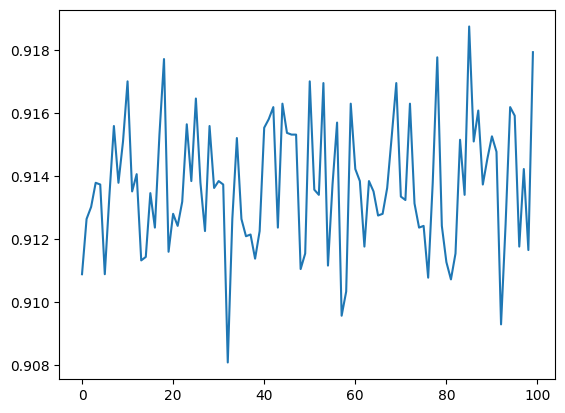

In [57]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [38]:
import qtm.qcompilation
import numpy as np
import types, qiskit
num_qubits = 3
num_layers = 1


thetas = np.ones((3*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_hypergraph_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)
    #compiler.save("", text = "", path = f"../experiments/polygon_graph_ghz_{num_layers}_layer_{optimizer}_scheduler/3/", save_all = True)
    


Step:   0%|          | 0/100 [4:10:41<?, ?it/s]




































































































Step: 100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


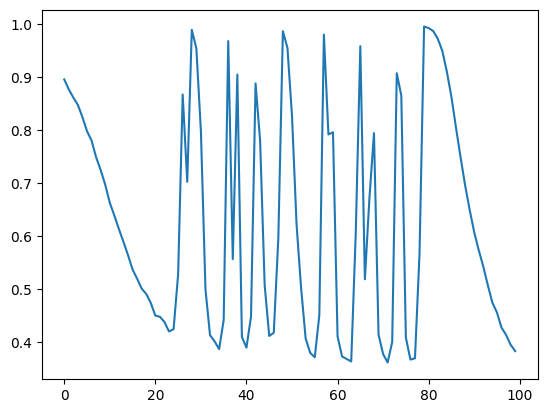

In [39]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)